In [26]:
#importa as bibliotecas
import datetime as dt
import bs4 as bs
import requests
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
from matplotlib import pyplot as plt

In [29]:
# Entrada
num_acoes = 2

In [ ]:
#decide intervalo de tempo a ser estudado
data_inicial = dt.datetime(2017,8,1)
data_final = dt.datetime(2018,1,1)

In [33]:
# pega as opcoes das 100 maiores empresas utilizando web scraping
resp = requests.get('https://en.wikipedia.org/wiki/S%26P_100')
soup = bs.BeautifulSoup(resp.text, 'lxml')
tabela_sp_100 = soup.find('table',{'class':'wikitable sortable'})
tickers = []
for linha in tabela_sp_100.find_all('tr')[1:]:
    tickers.append(linha.findAll('td')[0].text.replace("\n",''))
tickers = tickers[:num_acoes] 
tickers # mostra somente as primeiras

['AAPL', 'ABBV']

In [75]:
# pega os precos das acoes
dados = pd.DataFrame()
for ticker in tickers:
    dados = dados.append(wb.DataReader(ticker,'robinhood',data_inicial,data_final))
dados.head()

close_price  high_price  interpolated   low_price  \
symbol begins_at                                                      
AAPL   2017-10-13  154.651700  154.937300         False  154.080300   
       2017-10-16  157.498600  157.616800         False  155.301800   
       2017-10-17  158.079800  158.473900         False  156.858300   
       2017-10-18  157.380400  158.316200         False  157.222800   
       2017-10-19  153.656700  154.740300         False  152.711000   

                   open_price session    volume  
symbol begins_at                                 
AAPL   2017-10-13  154.395500     reg  16394188  
       2017-10-16  155.548100     reg  24121452  
       2017-10-17  157.400100     reg  18997275  
       2017-10-18  158.030600     reg  16374164  
       2017-10-19  154.415200     reg  42584166

In [76]:
#renomeia e informa o tipo das colunas
dados = dados.reset_index().rename({'symbol':'acao','begins_at':'data','close_price':'preco_fechamento','high_price':'preco_maximo','low_price':'preco_minimo','open_price':'preco_abertura','volume':'quantidade'},axis='columns')
dados = dados.astype({'preco_fechamento':float,'preco_maximo':float,'preco_minimo':float,'preco_abertura':float})
dados.head()

,acao,data,preco_fechamento,preco_maximo,interpolated,preco_minimo,preco_abertura,session,quantidade
0,AAPL,2017-10-13,154.6517,154.9373,False,154.0803,154.3955,reg,16394188
1,AAPL,2017-10-16,157.4986,157.6168,False,155.3018,155.5481,reg,24121452
2,AAPL,2017-10-17,158.0798,158.4739,False,156.8583,157.4001,reg,18997275
3,AAPL,2017-10-18,157.3804,158.3162,False,157.2228,158.0306,reg,16374164
4,AAPL,2017-10-19,153.6567,154.7403,False,152.7110,154.4152,reg,42584166


acao
AAPL    AxesSubplot(0.125,0.2;0.775x0.68)
ABBV    AxesSubplot(0.125,0.2;0.775x0.68)
dtype: object

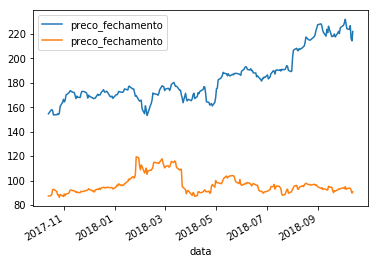

In [86]:
fig, ax = plt.subplots()
dados.groupby('acao').plot(x='data',y='preco_fechamento',ax=ax)